## Imports
Execute the cell below to import all packages needed.

In [45]:
# System functionality
import sys
sys.path.append('..')

import glob
import os
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import graphviz
import math as math
import json
import cv2
import scipy.stats as stats
import matplotlib.image as mpimg
import sklearn.feature_selection as feature_selection
from skimage import data, io, filters
from numpy import linspace
from numpy.core.umath import pi
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
from emoji_extractor.extract import Extractor
from emojipedia import Emojipedia
from skimage import io
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency
from scipy.interpolate import spline

## Load csv into pandas dataframe

In [2]:
path__tweets_csv = '/home/stelios/Desktop/Honours Project/Samples/tweet_data/tweets_ran_all.csv'
path_users_csv = '/home/stelios/Desktop/Honours Project/Samples/user_data/ran.csv'

#ran_tweets_df = pd.read_csv(path__tweets_csv,index_col=None, header=0, low_memory = False).applymap(str)

ran_join_df = pd.read_csv(path__tweets_csv,index_col=None, header=0, low_memory = False).applymap(str).join(pd.read_csv(path_users_csv,index_col=None, header=0, low_memory = False).applymap(str).set_index('user_id'), on='user_id')

## Bar Chart Formatters

In [50]:
# Millions Formatter Function
def millions(x,pos):
    return '%1.1fK' % (x*1e-3)

# Power of 10 Formatter Function (y log scale bug, so i have created this formatter)
def pow10(x,pos):
    return "{:.0f}\n10 ".format(x)

# Power of 10 (1 d.p) Formatter Function (y log scale bug, so i have created this formatter)
def pow10_1dp(x,pos):
    return "{:.1f}\n10     ".format(x)

# Percenatge Formatter Function
def percentage(x,pos):
    return "{:.1f}%".format(x*100)

# Create a formatters
formatter_millions = FuncFormatter(millions)
formatter_pow10 = FuncFormatter(pow10)
formatter_pow10_1dp = FuncFormatter(pow10_1dp)
formatter_percentage = FuncFormatter(percentage)

# Use TwitterColorEmoji Font (only one supporting emojis) 
emojis_font = FontProperties(fname='./Fonts/TwitterColorEmoji-SVGinOT.ttf',size=55)

## Colours

In [48]:
colors_seagreen_fade=["#f3f8f3","#e8f1e8","#ddeadd","#d2e4d2","#c7ddc7","#bbd6bb","#b0d0b0","#a5c9a5","#9ac29a","#8fbc8f","#80a980","#729672","#648364","#557055","#475e47","#394b39"]

colors_orange_fade=["#fff6e5","#ffedcc","#ffe4b2","#ffdb99","#ffd27f","#ffc966","#ffc04c","#ffb732","#ffae19","#ffa500","#e59400","#cc8400","#b27300","#996300","#7f5200","#664200"]

colors_dodgeblue_fade=["#e7f1fa","#d0e3f5","#b9d5f0","#a2c7eb","#8bb9e6","#74abe1","#5d9ddc","#468fd7","#2f81d2","#1874cd","#1568b8","#135ca4","#10518f","#0e457b","#0c3a66","#092e52"]

colors_indianred_fade=["#faeeee","#f5dddd","#f0cccc","#ebbbbb","#e6aaaa","#e19999","#dc8888","#d77676","#d26666","#cd5555","#b84c4c","#a44444","#8f3b3b","#7b3333","#662a2a","#522222"]

## Emojis on Pie Chart Function

In [49]:
def pie_chart_plot_emojis(ax,fig,x):
    # Set sizes of figure and images
    ax_width = ax.get_window_extent().width
    fig_width = fig.get_window_extent().width
    fig_height = fig.get_window_extent().height
    img_size = ax_width/(fig_width*len(x_linespace))
    img_axs = [None for i in range(len(x_linespace))]

    y_manual = 0.843
    loc = ax.transData.transform((1.88, y_manual))
    img_axs[0] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2, img_size, img_size], anchor='C')
    img_axs[0].imshow(io.imread("/home/stelios/Desktop/Honours Project/Emojis-usage-in-social-media-by-demographics/Jupyter/Fonts&Pics/other_less.png"))
    img_axs[0].axis("off")
    y_manual =y_manual-0.1408

    # Display emojis pngs on x-axis
    for i in range(len(x)):
        loc = ax.transData.transform((1.88, y_manual))      # Optimize y manually 
        img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2, img_size, img_size], anchor='C')
        y_manual =y_manual-0.1408
        # Platform 5 = Twitter
        img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
        img_axs[i].axis("off")

## Emojis on Bar Chart Function

In [53]:
def bar_chart_plot_emojis(ax,fig,x,y):
    # Set sizes of figure and images
    ax_width = ax.get_window_extent().width
    fig_width = fig.get_window_extent().width
    fig_height = fig.get_window_extent().height
    img_size = ax_width/(fig_width*len(x_linespace))
    img_axs = [None for i in range(len(x_linespace))]
    
    ##delete
    #a = io.imread(Emojipedia.search(x[1]).platforms[5].image_url)

    # Display emojis pngs on x-axis
    for i in range(len(x)):
        loc = ax.transData.transform((x_linespace[i], y[i]))      # Optimize y manually 
        img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2,
                                   img_size, img_size], anchor='C')

        # Platform 5 = Twitter
        img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
        img_axs[i].axis("off")
        
        ##delete
        #img_axs[i].imshow(a)
        #img_axs[i].axis("off")

## Extract, Count & Sort Emojis for all

In [3]:
extract = Extractor()

count = extract.count_all_emoji(ran_join_df['text'])

# Display most common
#count.most_common()

# Create panda dataframe to store emojis with counts
emojis_count_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count:
    emojis_count_df = emojis_count_df.append({'Emoji' : emoji , 'Count' : count[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_df = emojis_count_df.sort_values(by=['Count'])
emojis_count_df.tail(20)
#print(done)

NameError: name 'done' is not defined

In [5]:
## TABLE

In [16]:
ran_users_df = pd.read_csv(path_users_csv,index_col=None, header=0, low_memory = False).applymap(str)

length_emojis = len(emojis_count_df['Emoji'].values)
print(length_emojis)
length_users = len(ran_users_df['user_id'])

# Avoid Low Memory Error
#from scipy.sparse import *
import numpy
#zeros_matrix = csr_matrix( (length_users,length_emojis), dtype=int8 ).todense()
zeros_matrix= numpy.zeros(shape=(length_users,length_emojis))
# Fill pandas dataframe with zeros
emojis_count_create_df = pd.DataFrame(zeros_matrix,columns = emojis_count_df['Emoji'].values)
emojis_count_create_df

#countloop =0
extract = Extractor()

# Add the frequencies of each emoji by Tweet
for enum,user in enumerate (ran_users_df['user_id']):
    #countloop = countloop+1
    #print(countloop)
    user_posts= "".join(ran_join_df.loc[ran_join_df['user_id'] == user, 'text'])
    text_count_emoji = extract.count_emoji(user_posts, check_first=True)
    #print(user)
    #print(text_count_emoji)
    if(len(text_count_emoji)==0):
        #print("Non")
        pass
    else:
        for emoji in text_count_emoji:
            #print(emoji)
            emojis_count_create_df.at[enum, emoji] = text_count_emoji[emoji]
            #print(text_count_emoji[emoji])
            #print(emojis_count_create_df.head(10))
# Describe throws memory error
##emojis_count_create_df.describe() 
emojis_count_create_df.info(memory_usage='deep')
#emojis_count_create_df

2348
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 2361 entries, 👨🏿‍🔬 to 🇧🇼
dtypes: float64(2361)
memory usage: 180.1 MB


In [56]:
# afu efies ta midenika katw

emojis_count_create_df.to_csv("/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/random_per_user_emoji_counts.csv",encoding='utf-8', index=False)

In [17]:
emojis_count_create_df['😂']

0         0.0
1         0.0
2         8.0
3         0.0
4       145.0
5         0.0
6         0.0
7         1.0
8         0.0
9        36.0
10      251.0
11        3.0
12        0.0
13        0.0
14        8.0
15        0.0
16        0.0
17        0.0
18        1.0
19        1.0
20        0.0
21       18.0
22        5.0
23        2.0
24        9.0
25        0.0
26        0.0
27        0.0
28        0.0
29        2.0
        ...  
9970      0.0
9971      0.0
9972      0.0
9973      0.0
9974      0.0
9975      0.0
9976      0.0
9977      0.0
9978      0.0
9979      0.0
9980      0.0
9981     17.0
9982      0.0
9983     25.0
9984      0.0
9985     12.0
9986      0.0
9987      1.0
9988      0.0
9989      1.0
9990      0.0
9991     90.0
9992      0.0
9993      7.0
9994      0.0
9995      0.0
9996      4.0
9997      0.0
9998      0.0
9999      0.0
Name: 😂, Length: 10000, dtype: float64

In [ ]:
## ADD GENDER COLUMN

In [35]:
# Add gender column
#del ran_join_df
emojis_count_create_df['gender'] = ran_users_df['gender']
emojis_count_create_df = emojis_count_create_df.fillna(0.0)
emojis_count_create_df.describe()

,👨🏿‍🔬,🚵🏽‍♂️,👨🏾‍🎤,👩🏾‍🏫,🙍🏽‍♂️,🇮🇨,👳🏾‍♀️,👨🏾‍🏫,🦠,💂🏻‍♀️,...,🇸🇨,🇦🇼,🇰🇾,🇰🇬,🇼🇸,🇦🇶,🇱🇦,🇲🇪,🇲🇵,🇧🇼
count,10000.0000,10000.0000,10000.0,10000.0,10000.0000,10000.0000,10000.0000,10000.0,10000.0000,10000.0000,...,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.000000,10000.0000,10000.0000,10000.0000,10000.0000
mean,0.0001,0.0001,0.0,0.0,0.0001,0.0002,0.0001,0.0,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0005,0.0001,0.000200,0.0001,0.0002,0.0001,0.0003
std,0.0100,0.0100,0.0,0.0,0.0100,0.0200,0.0100,0.0,0.0100,0.0100,...,0.0100,0.0100,0.0100,0.0500,0.0100,0.014141,0.0100,0.0200,0.0100,0.0300
min,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0000
75%,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0000
max,1.0000,1.0000,0.0,0.0,1.0000,2.0000,1.0000,0.0,1.0000,1.0000,...,1.0000,1.0000,1.0000,5.0000,1.0000,1.000000,1.0000,2.0000,1.0000,3.0000


In [42]:
emojis_count_create_df
gender_emojis_count_create_df = emojis_count_create_df[emojis_count_create_df.gender != "nan"]
gender_emojis_count_create_df.

,👨🏿‍🔬,🚵🏽‍♂️,👨🏾‍🎤,👩🏾‍🏫,🙍🏽‍♂️,🇮🇨,👳🏾‍♀️,👨🏾‍🏫,🦠,💂🏻‍♀️,...,🇦🇼,🇰🇾,🇰🇬,🇼🇸,🇦🇶,🇱🇦,🇲🇪,🇲🇵,🇧🇼,gender
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,male
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,male
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,male
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,male
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female


In [18]:
## CHI2 CLASS

In [43]:
class ChiSquare:
    
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha,emoji_dictionary):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT".format(colX)
            
        else:
            result="{0} is NOT an important".format(colX)
        #print("{}  {}".format(result,self.p))
        emoji_dictionary[colX]=self.p
    
    def TestIndependence(self,colX,colY,emoji_dictionary, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        #print("{} ".format(chi2))
        self._print_chisquare_result(colX,alpha,emoji_dictionary)

In [ ]:
#CHI2 GENDER

In [46]:
#Initialize ChiSquare Class
cT = ChiSquare(gender_emojis_count_create_df)

#Feature Selection
emoji_dict={}
for enum,emoji in enumerate (emojis_count_df['Emoji'].values):
    #print(enum)
    cT.TestIndependence(colX=emoji,colY="gender",emoji_dictionary=emoji_dict)
print("Done 1")
# Mean for males(+) - Mean for females(-)
mean_gender = gender_emojis_count_create_df.loc[gender_emojis_count_create_df['gender'] == 'male'].mean() - gender_emojis_count_create_df.loc[gender_emojis_count_create_df['gender'] == 'female'].mean()
mean_gender_dict = mean_gender.to_dict()
print("Done 2")
# Sorted by uncorrelated
sorted_by_value = sorted(emoji_dict.items(), key=lambda kv: kv[1])
print("Done 3")
# Dictionary sorted by uncorrelated emojis with gender
sorted_gender = {}
for key,value in sorted_by_value:
   # print(key)
    for key2 in mean_gender_dict:
       # print(key2)
        if(key==key2):
            if(mean_gender_dict[key2]>0):
                sorted_gender[key]='Males'
            elif(mean_gender_dict[key2]<0):
                sorted_gender[key]='Females'
            else:
                sorted_gender[key]='Same'
print("Done 4")
                
# Dataframe to plot
df_to_plot_gender = pd.DataFrame(data=sorted_by_value,columns=['Emoji','P-value'])
df_to_plot_gender['Gender'] = sorted_gender.values()
df_to_plot_gender

Done 1
Done 2
Done 3
Done 4


,Emoji,P-value,Gender
0,🤷🏻‍♀️,9.215117e-14,Females
1,💕,4.627381e-11,Females
2,🤷🏽‍♀️,1.722886e-10,Females
3,💔,3.908399e-09,Females
4,🤦🏻‍♀️,1.275065e-08,Females
5,🤦🏽‍♀️,1.882728e-08,Females
6,💖,2.086097e-08,Females
7,🙄,2.458695e-08,Females
8,🤤,3.432649e-08,Females
9,👭,4.966584e-08,Females


In [ ]:
## Plot

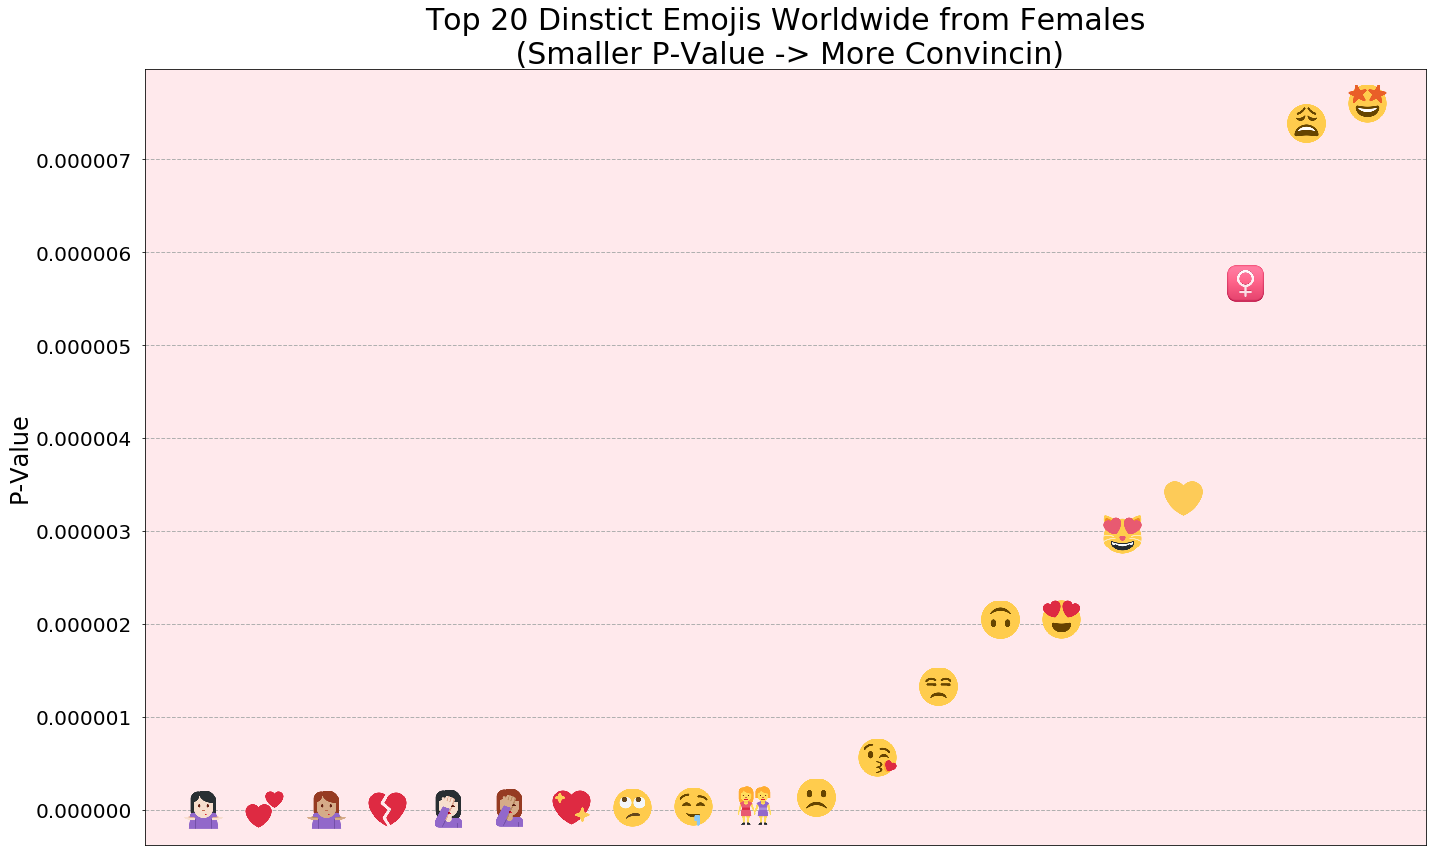

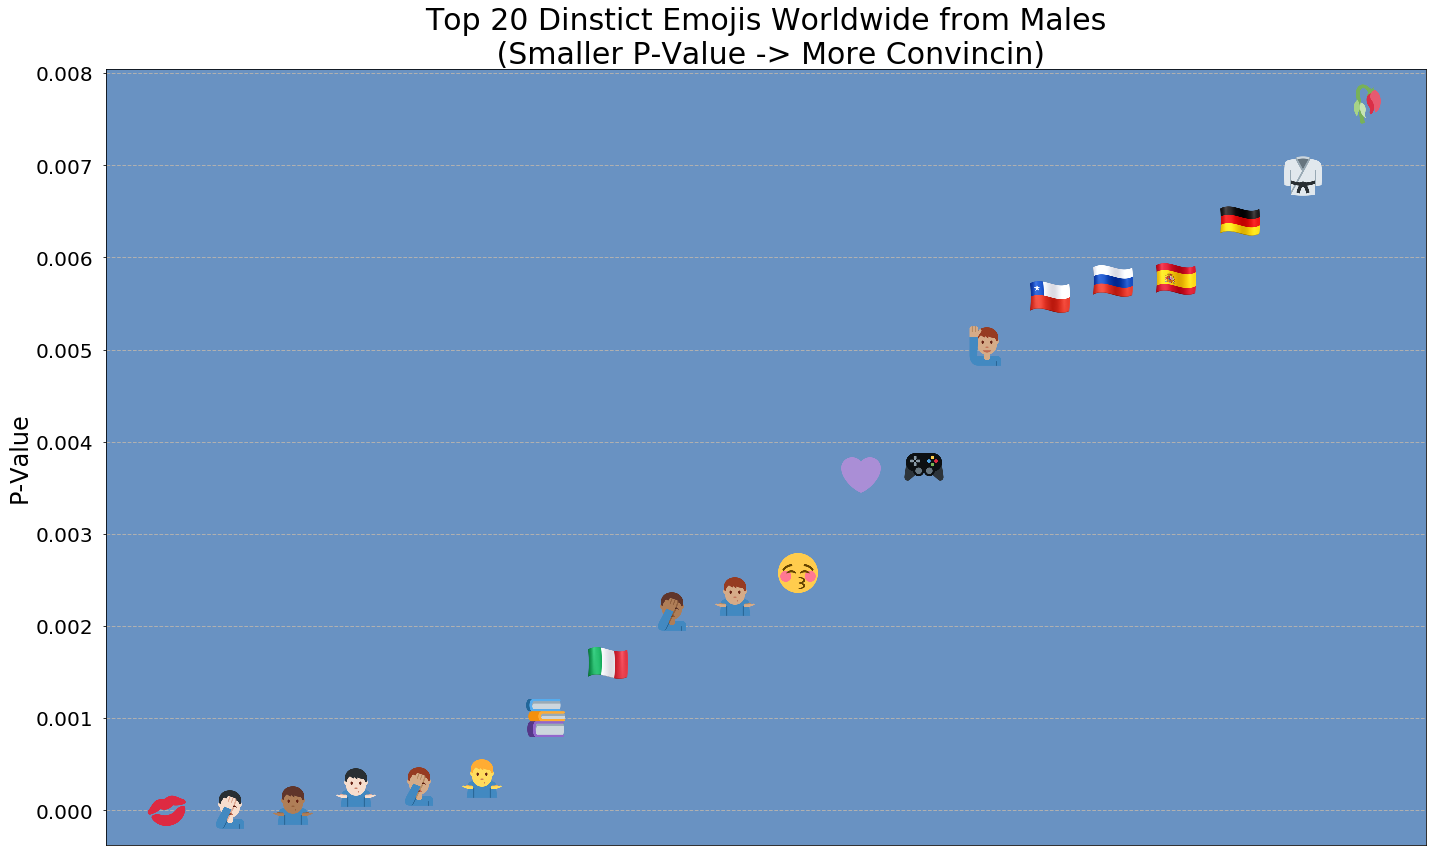

In [55]:
gender_list = ['Females','Males']
gender_graph_colours=['ffe9ec','6992C2']

for ind,gen in enumerate(gender_list):
    
    # Top 15 Values
    x=[]
    y=[]
    counter_20 = 0
    for index, row in df_to_plot_gender.iterrows():
        if(row['Gender']==gen):
            counter_20 = counter_20 +1 
            x.append(row['Emoji'])
            y.append(row['P-value'])
            
            if(counter_20 ==20):
                break

    # Set linespacing
    x_linespace = linspace(0, 4*pi, num=20)

    # Plot Chart
    fig, ax = plt.subplots(figsize=(20,12))
    ax.tick_params(axis='both', which='major', pad=10)
    ax.set_facecolor('#{}'.format(gender_graph_colours[ind]))
    plt.grid(linestyle='--', linewidth=1,axis='y')
    plt.plot(x_linespace, y,linewidth=0,color = 'grey',linestyle=':')
    ax.get_xaxis().set_visible(False)
    plt.yticks(fontsize =20)
    plt.ylabel('P-Value', fontsize =24)
    plt.title('Top 20 Dinstict Emojis Worldwide from {}\n (Smaller P-Value -> More Convincin)'.format(gender_list[ind]), fontsize =30)
    plt.tight_layout()
    
    # Change offest size
    ax.yaxis.offsetText.set_fontsize(20)
    
    # Set y-lim to 0
    #ax.set_ylim(bottom=0)

    # Plot emojis on x-axis
    bar_chart_plot_emojis(ax,fig,x,y)
    plt.show()